
# Data Mining + Prak
*   Nama  : Fauzan Kamil
*   NPM   : 201910225134



Import Library

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import os
import zipfile
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Download Dataset

In [2]:
!wget --no-check-certificate \     https://github.com/Fauzan-Kamil/piton-data/blob/main/cabe.zip?raw=true \
                                   -O /tmp/cabe.zip 

--2022-06-15 10:45:13--  http://%20/
Resolving   ( )... failed: Name or service not known.
wget: unable to resolve host address ‘ ’
--2022-06-15 10:45:13--  https://github.com/Fauzan-Kamil/piton-data/blob/main/cabe.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Fauzan-Kamil/piton-data/raw/main/cabe.zip [following]
--2022-06-15 10:45:14--  https://github.com/Fauzan-Kamil/piton-data/raw/main/cabe.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fauzan-Kamil/piton-data/main/cabe.zip [following]
--2022-06-15 10:45:14--  https://raw.githubusercontent.com/Fauzan-Kamil/piton-data/main/cabe.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.g

In [3]:
!wget --no-check-certificate \    https://github.com/Fauzan-Kamil/piton-data/blob/main/valid.zip?raw=true \
                                  -O /tmp/valid.zip 

--2022-06-15 10:45:28--  http://%20/
Resolving   ( )... failed: Name or service not known.
wget: unable to resolve host address ‘ ’
--2022-06-15 10:45:28--  https://github.com/Fauzan-Kamil/piton-data/blob/main/valid.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Fauzan-Kamil/piton-data/raw/main/valid.zip [following]
--2022-06-15 10:45:28--  https://github.com/Fauzan-Kamil/piton-data/raw/main/valid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fauzan-Kamil/piton-data/main/valid.zip [following]
--2022-06-15 10:45:28--  https://raw.githubusercontent.com/Fauzan-Kamil/piton-data/main/valid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to 

Ekstrak Gambar yang telah di download

In [4]:
local_zip = '/tmp/cabe.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/valid.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
#Cabe hijau di file cabe
cabe_hijau_dir = os.path.join('/tmp/cabe/train/cabe-hijau')
#Cabe merah di file cabe
cabe_merah_dir = os.path.join('/tmp/cabe/train/cabe-merah')

#Cabe hijau di file valid
valid_hijau_dir = os.path.join('/tmp/cabe/train/cabe-hijau')
#Cabe Merah di file valid
valid_merah_dir = os.path.join('/tmp/cabe/train/cabe-merah')

Total data

In [6]:
print('Total gambar cabe hijau\t: ', len(os.listdir(cabe_hijau_dir)))
print('Total gambar cabe merah\t: ', len(os.listdir(cabe_merah_dir)))
print("==============================")
print('Total valid cabe hijau\t: ', len(os.listdir(valid_hijau_dir)))
print('Total valid cabe merah\t: ', len(os.listdir(valid_merah_dir)))

Total gambar cabe hijau	:  440
Total gambar cabe merah	:  440
Total valid cabe hijau	:  440
Total valid cabe merah	:  440


Visual/Lihat beberapa data gambar

In [7]:
cabe_hijau_names = os.listdir(cabe_hijau_dir)
cabe_merah_names = os.listdir(cabe_merah_dir)

In [8]:
nrows = 5
ncols = 5

pic_index = 0

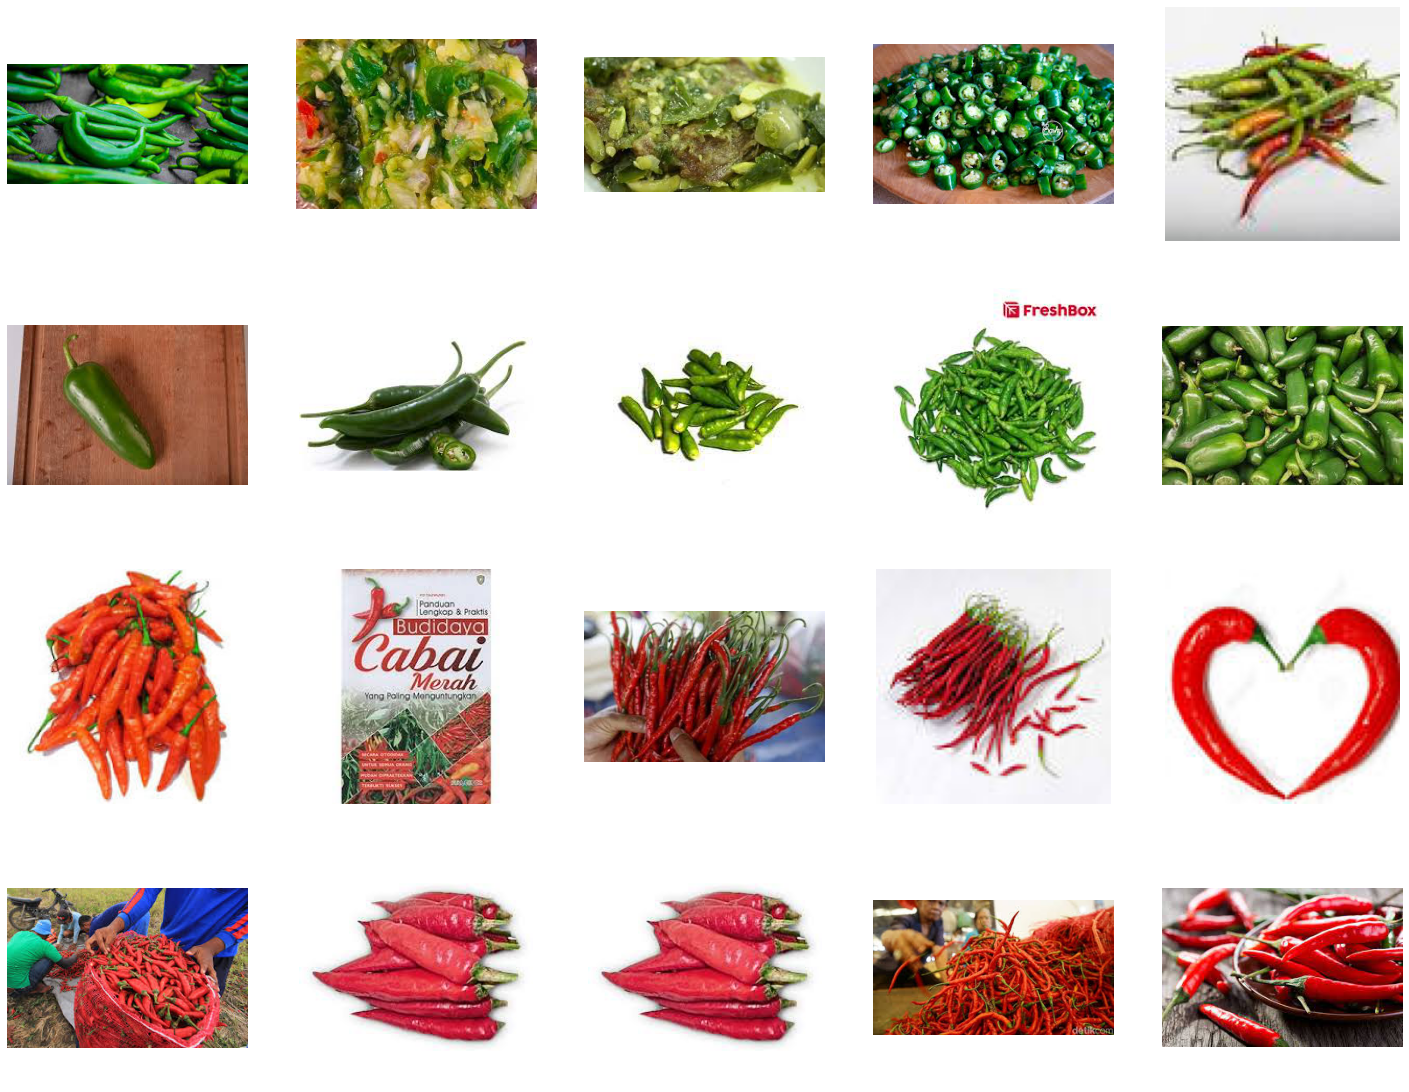

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 10
next_hijau_pic = [os.path.join(cabe_hijau_dir, fname)
              for fname in cabe_hijau_names[pic_index-10:pic_index]]
next_merah_pic = [os.path.join(cabe_merah_dir, fname)
               for fname in cabe_merah_names[pic_index-10:pic_index]]

for i, img_path in enumerate(next_hijau_pic + next_merah_pic):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Data Generator

In [16]:
cabe_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

cabe_generator = cabe_datagen.flow_from_directory(
      '/tmp/cabe/train', 
      classes = ['cabe-hijau','cabe-merah'],
      target_size = (200, 200),
      batch_size = 100,
      class_mode = 'binary'
)
validation_generator = validation_datagen.flow_from_directory(
      '/tmp/cabe/train',
      classes = ['cabe-hijau', 'cabe-merah'],
      target_size = (200, 200),
      batch_size = 100,
      class_mode = 'binary',
      shuffle = False
)

Found 880 images belonging to 2 classes.
Found 880 images belonging to 2 classes.


Model

In [17]:
model = tf.keras.models.Sequential([
                                    #Layer Ke Satu
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Layer Ke Dua
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Layer Ke Tiga
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Layer Ke Empat
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    #tf.keras.layers.Dropout(0.5),
                                    #512 Neuron
                                    tf.keras.layers.Dense(500, activation='relu'),
                                    #1 output neuoron
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)      

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

Training Model

In [20]:
history = model.fit(cabe_generator,
      steps_per_epoch = 8,  
      epochs = 25,
      verbose = 1,
      validation_data = validation_generator, 
      validation_steps=8)

Epoch 1/25
8/8 [==============================] - 4s 388ms/step - loss: 0.8459 - accuracy: 0.5038 - val_loss: 0.6210 - val_accuracy: 0.5500
Epoch 2/25
8/8 [==============================] - 3s 361ms/step - loss: 0.5262 - accuracy: 0.7487 - val_loss: 0.2975 - val_accuracy: 0.9300
Epoch 3/25
8/8 [==============================] - 3s 359ms/step - loss: 0.2500 - accuracy: 0.9112 - val_loss: 0.2544 - val_accuracy: 0.8925
Epoch 4/25
8/8 [==============================] - 3s 358ms/step - loss: 0.1800 - accuracy: 0.9295 - val_loss: 0.1299 - val_accuracy: 0.9588
Epoch 5/25
8/8 [==============================] - 3s 356ms/step - loss: 0.1282 - accuracy: 0.9603 - val_loss: 0.1307 - val_accuracy: 0.9588
Epoch 6/25
8/8 [==============================] - 3s 361ms/step - loss: 0.1125 - accuracy: 0.9628 - val_loss: 0.1111 - val_accuracy: 0.9675
Epoch 7/25
8/8 [==============================] - 3s 365ms/step - loss: 0.1080 - accuracy: 0.9613 - val_loss: 0.0936 - val_accuracy: 0.9725
Epoch 8/25
8/8 [====

Akurasi

In [21]:
model.evaluate(validation_generator)

9/9 [==============================] - 1s 153ms/step - loss: 0.0101 - accuracy: 0.9977


[0.01009327732026577, 0.9977272748947144]

Upload

Saving merah.jpg to merah.jpg
[1.]
merah.jpg ini adalah cabe merah


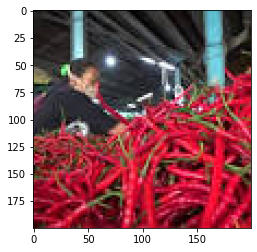

In [22]:
uploaded = files.upload()
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=25)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " ini adalah cabe hijau")
  else:
    print(fn + " ini adalah cabe merah")